# Crop and paste images
This notebook was translated from [ImageJ Macro](https://clij.github.io/clij2-docs/md/crop_and_paste/).

It shows how  to crop and paste images in the GPU.

## Initialize GPU

In [1]:
import pyclesperanto_prototype as cle

from skimage.io import imread, imsave, imshow
import matplotlib
import numpy as np

# initialize GPU
cle.select_device("GTX")
print("Used GPU: " + cle.get_device().name)

Used GPU: Intel(R) UHD Graphics


## Get example data and push it to the GPU

c:\users\rober\miniconda3\lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:150: UserWarning: Float image out of standard range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


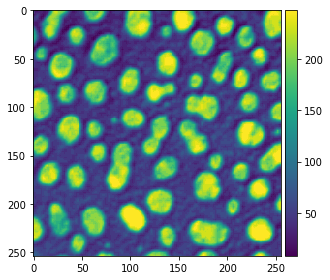

In [2]:
# load data
image = imread('https://samples.fiji.sc/blobs.png')

gpu_image = cle.push_zyx(image)

imshow(cle.pull_zyx(gpu_image))

In [3]:
## Crop out a part of the image

c:\users\rober\miniconda3\lib\site-packages\pyopencl\__init__.py:252: CompilerWarning: Non-empty compiler output encountered. Set the environment variable PYOPENCL_COMPILER_OUTPUT=1 to see more.
  warn("Non-empty compiler output encountered. Set the "


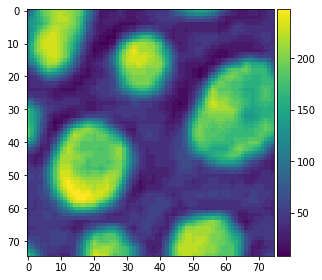

In [4]:
width = 75
height = 75
tile = cle.create([width, height])

x = 10
y = 10
cle.crop(gpu_image, tile, x, y)

imshow(cle.pull_zyx(tile))

## Create output image
We create an empty image and make a collage by pasting the cropped image into it. We also transform the cropped image for visualisation purpose:

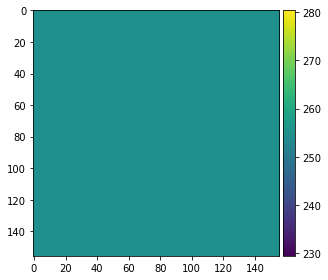

In [5]:
collage = cle.create([width * 2 + 6, height * 2 + 6])

# "white" background
cle.set(collage, 255)

imshow(cle.pull_zyx(collage))

## Paste tiles

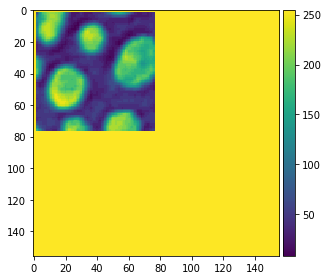

In [6]:
cle.paste(tile, collage, 2, 2)

imshow(cle.pull_zyx(collage))

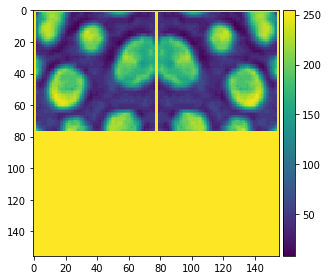

In [7]:
flip_tile = cle.flip(tile, flip_x=True, flip_y=False)
cle.paste(flip_tile, collage, width + 4, 2)

imshow(cle.pull_zyx(collage))

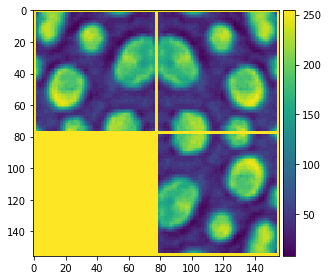

In [8]:
flip_tile = cle.flip(tile, flip_x=True, flip_y=True)
cle.paste(flip_tile, collage, width + 4, height + 4)

imshow(cle.pull_zyx(collage))

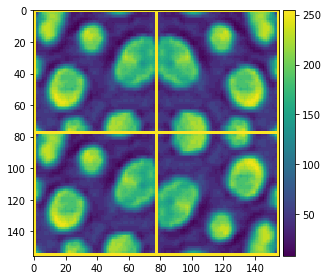

In [9]:
flip_tile = cle.flip(tile, flip_x=False, flip_y=False)
cle.paste(flip_tile, collage, 2, height + 4)

imshow(cle.pull_zyx(collage))